In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns' ,50)

In [70]:
data_path = r"D:\Data Science\MachineLearning\Project\FinancialInstituePrediction\Data\complaints.csv"
data = pd.read_csv(data_path)

In [71]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",UT,84124,NaN,Consent not provided,Web,2024-02-28,Closed with non-monetary relief,Yes,NaN,8440780
1,2024-06-15,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30180,NaN,NaN,Web,2024-06-15,In progress,Yes,NaN,9267383
2,2024-06-08,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,GA,30083,NaN,Consent not provided,Web,2024-06-08,Closed with explanation,Yes,NaN,9201093
3,2024-06-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",CA,94124,NaN,NaN,Web,2024-06-15,In progress,Yes,NaN,9267475
4,2024-06-08,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,TN,38016,NaN,NaN,Web,2024-06-08,In progress,Yes,NaN,9201504


In [72]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        739085
Consumer complaint narrative    3548007
Company public response         2825105
Company                               0
State                             46204
ZIP code                          30226
Tags                            4958126
Consumer consent provided?      1059113
Submitted via                         0
Date sent to company                  0
Company response to consumer         15
Timely response?                      0
Consumer disputed?              4683938
Complaint ID                          0
dtype: int64

In [73]:
data.describe()

,Complaint ID
count,5.452254e+06
mean,5.356496e+06
std,2.502407e+06
min,1.000000e+00
25%,3.338149e+06
50%,5.639240e+06
75%,7.551099e+06
max,9.283811e+06


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452254 entries, 0 to 5452253
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 748.

In [75]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [76]:
data['Consumer disputed?'].value_counts(normalize=True)*100

Consumer disputed?
No     80.687894
Yes    19.312106
Name: proportion, dtype: float64

In [77]:
data.shape

(5452254, 18)

In [78]:
data.replace('' ,np.nan ,inplace=True)

In [79]:
data.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,5452254,5452254,5216959,5452248,4713169,1904247,2627149,5452254,5406050,5422028,494128,4393141,5452254,5452254,5452239,5452254,768316,5.452254e+06
unique,4581,21,86,178,272,1530730,11,7264,63,33738,3,4,7,4530,8,2,2,NaN
top,2024-05-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2024-05-15,Closed with explanation,Yes,No,NaN
freq,8815,2163876,3340740,1617481,1071796,8610,2374018,1153218,659656,123314,292235,2213435,4896828,8893,3554817,5393203,619938,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.356496e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.502407e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.338149e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.639240e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.551099e+06


In [80]:
numerical_columns = data.select_dtypes(exclude='object').columns
categorical_columns = data.select_dtypes(include='object').columns

In [81]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [82]:
data.drop(columns=['Tags' ,'Complaint ID' ,'ZIP code' ,'Sub-product' ,'Sub-issue' ,'Company public response' ,'Consumer complaint narrative' ] ,inplace=True)

In [83]:
data.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State',
       'Consumer consent provided?', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [84]:
for col in data.columns:
    print(col , data[col].nunique())

Date received 4581
Product 21
Issue 178
Company 7264
State 63
Consumer consent provided? 4
Submitted via 7
Date sent to company 4530
Company response to consumer 8
Timely response? 2
Consumer disputed? 2


# Visualization using Pandas Library 
1. Target Feature(Customer Disputed)

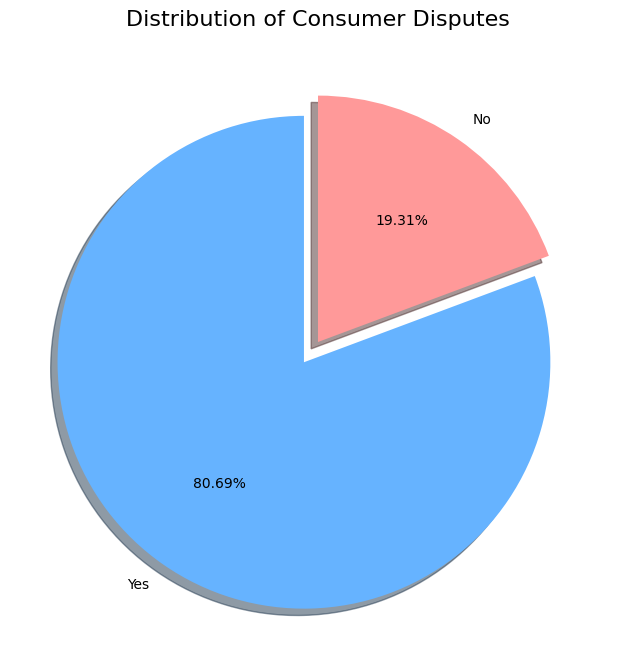

In [85]:
percentage = data['Consumer disputed?'].value_counts(normalize=True) * 100

# Data for the pie chart
labels = ['Yes', 'No']
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the 'Yes' slice

# Create the pie chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)

# Add a title
ax.set_title('Distribution of Consumer Disputes', fontsize=16)

# Display the pie chart
plt.show()

You can se data is imbalanced data

In [86]:
percentage.to_frame()

,proportion
Consumer disputed?,
No,80.687894
Yes,19.312106


In [87]:
product_ = (data['Product'].value_counts(normalize=True) * 100).to_frame()
product_ = product_[:10]

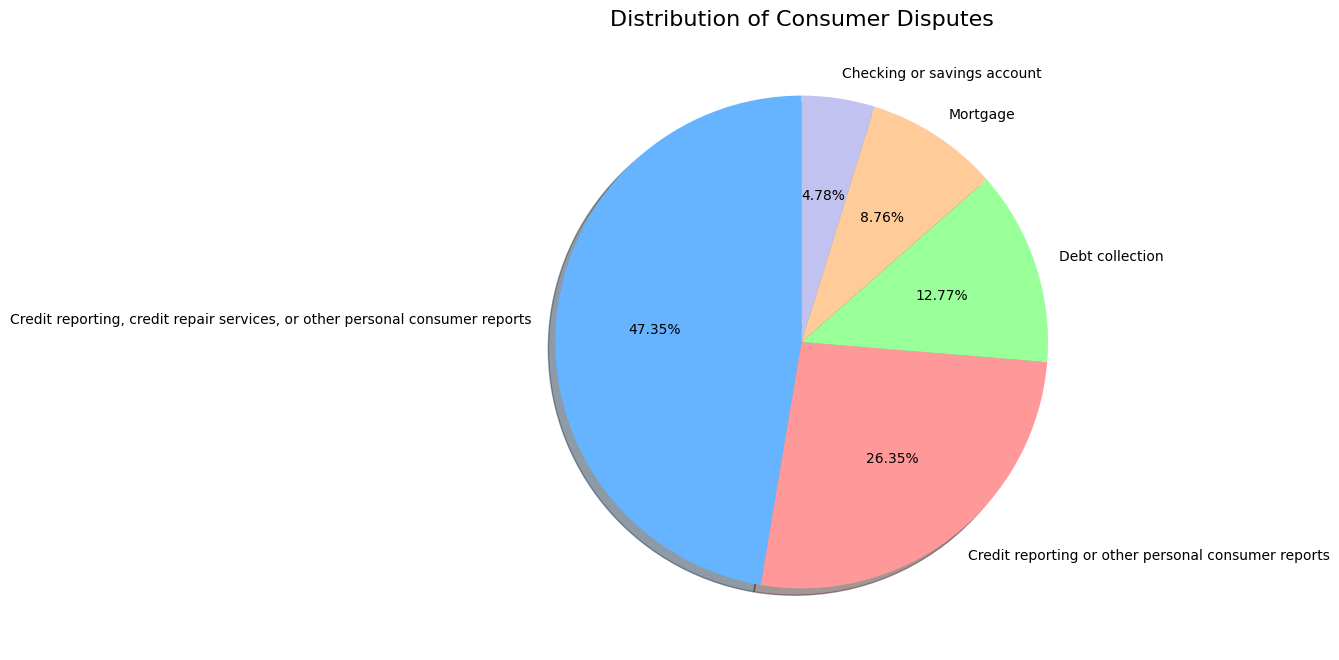

In [88]:
percentage = (data['Product'].value_counts(normalize=True) * 100).nlargest(5)
# percentage = product_[:10]
# Data for the pie chart
labels = percentage.index
# colors = [
#     '#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', 
#     '#ffb347', '#ffcc00', '#ff6666', '#c2f0c2', '#f0b3ff', '#8c8cff', '#ff8c8c', 
#     '#8cff8c', '#8cffff', '#f08cff', '#ff8cf0', '#b3b3ff', '#ffc08c', '#d9d9d9'
# ]
colors = [
    '#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0'
]


# Create the pie chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(percentage, labels=labels, startangle=90, autopct='%1.2f%%', shadow=True, colors=colors)

# Add a title
ax.set_title('Distribution of Consumer Disputes', fontsize=16)

# Display the pie chart
plt.show()

In [89]:
top_stats = (data.State.value_counts(normalize=True)*100)[:10]
top_stats.to_frame()

,proportion
State,
FL,12.202181
CA,11.443290
TX,10.874798
GA,6.952969
NY,6.481849
PA,4.785472
IL,4.235625
NJ,3.403687
NC,3.274812


<Axes: xlabel='State'>

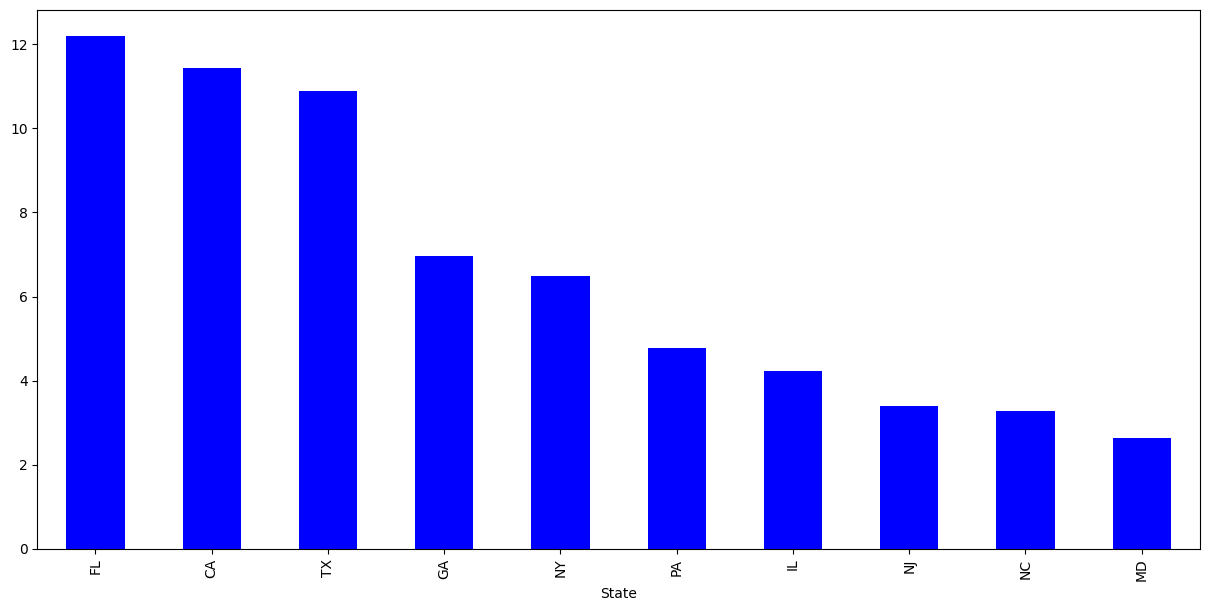

In [90]:
plt.subplots(figsize=(15, 7))
top_stats.plot(kind='bar' ,color='Blue')

# Feature Extraction And Model Building

In [91]:
data.isnull().sum()

Date received                         0
Product                               0
Issue                                 6
Company                               0
State                             46204
Consumer consent provided?      1059113
Submitted via                         0
Date sent to company                  0
Company response to consumer         15
Timely response?                      0
Consumer disputed?              4683938
dtype: int64

In [130]:
data['Consumer disputed?'].value_counts()

Consumer disputed?
No     619938
Yes    148378
Name: count, dtype: int64

You have two diffrent dates available 1. Date received and 2.Date sent to company
But we can create 3rd column days required to forward complaints

In [93]:
data[['Date received' ,'Date sent to company']].head(3)

,Date received,Date sent to company
0,2024-02-28,2024-02-28
1,2024-06-15,2024-06-15
2,2024-06-08,2024-06-08


In [94]:
data['Date received'] = pd.to_datetime(data['Date received'])
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'])

# Calculate the difference in days
data['Days Difference'] = (data['Date sent to company'] - data['Date received']).dt.days

print(data['Days Difference'] )

0          0
1          0
2          0
3          0
4          0
          ..
5452249    1
5452250    0
5452251    0
5452252    0
5452253    0
Name: Days Difference, Length: 5452254, dtype: int64


In [95]:
data.rename(columns={'Days Difference': 'days_to_forward_complaint'}, inplace=True)

In [96]:
data.drop(columns=['Date sent to company' ,'Date received'],axis=1 ,inplace=True)

In [97]:
data.shape

(5452254, 10)

#It will be difficult to train model onn succh ammount of huge data so insted we will take sample

In [98]:
df1 = data.groupby('Consumer disputed?').sample(n= 50000)
df1.reset_index(inplace=True)

In [99]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer ,TfidfTransformer
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\PRAMOD
[nltk_data]     KHAVARE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\PRAMOD
[nltk_data]     KHAVARE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [100]:
# Let's apply stemming and stopwords on the data
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import string


In [101]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [128]:
df1['Consumer disputed?'].value_counts()

Consumer disputed?
No     50000
Yes    50000
Name: count, dtype: int64

In [103]:
df1['Issue'] = df1['Issue'].apply(clean_text)

In [126]:
df1.head()

,Product,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,days_to_forward_complaint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318
0,Bank account or service,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,NaN,Referral,Closed with explanation,Yes,No,2,0.274846,0.399767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,Mortgage,U.S. BANCORP,NV,NaN,Fax,Closed with explanation,Yes,No,1,0.301479,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,Mortgage,WELLS FARGO & COMPANY,NJ,Consent provided,Web,Closed with explanation,Yes,No,0,0.301479,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,Bank account or service,PNC Bank N.A.,NJ,NaN,Postal mail,Closed without relief,Yes,No,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0
4,Mortgage,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,NaN,Web,Closed with explanation,Yes,No,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [105]:
df1['Consumer disputed?'].value_counts()

Consumer disputed?
No     50000
Yes    50000
Name: count, dtype: int64

# Data Prepreprocessing

In [106]:
#Vectorization Of Data 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=None ,strip_accents='unicode' ,analyzer='word' ,ngram_range=(1,2))
df_vect = tfidf.fit_transform(df1['Issue'])
feature_names = tfidf.get_feature_names_out()

In [107]:
df1 = pd.concat([df1 ,pd.DataFrame(df_vect.toarray())] ,axis=1)

In [108]:
df1.head()

,index,Product,Issue,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,days_to_forward_complaint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,...,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318
0,946147,Bank account or service,account open close manag,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,NaN,Referral,Closed with explanation,Yes,No,2,0.274846,0.399767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,5222402,Mortgage,loan servic payment escrow account,U.S. BANCORP,NV,NaN,Fax,Closed with explanation,Yes,No,1,0.301479,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,4904685,Mortgage,loan servic payment escrow account,WELLS FARGO & COMPANY,NJ,Consent provided,Web,Closed with explanation,Yes,No,0,0.301479,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,4701045,Bank account or service,deposit withdraw,PNC Bank N.A.,NJ,NaN,Postal mail,Closed without relief,Yes,No,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0
4,5318214,Mortgage,loan modificationcollectionforeclosur,"BANK OF AMERICA, NATIONAL ASSOCIATION",CO,NaN,Web,Closed with explanation,Yes,No,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


In [109]:
df1.drop(columns=['index' ,'Issue'],axis=1 ,inplace=True)

In [110]:
from sklearn.model_selection import train_test_split 
X = df1.drop(columns=['Consumer disputed?'] ,axis=1 )
Y = df1[['Consumer disputed?']]

In [124]:
Y

,Consumer disputed?
0,No
1,No
2,No
3,No
4,No
...,...
99995,Yes
99996,Yes
99997,Yes
99998,Yes


In [111]:
df1.sample(1)

,Product,Company,State,Consumer consent provided?,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,days_to_forward_complaint,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318
84244,Credit reporting,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,NaN,Postal mail,Closed with explanation,Yes,Yes,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
Y.head()

,Consumer disputed?
0,No
1,No
2,No
3,No
4,No


In [113]:
X.shape

(100000, 327)

# Create Pipeline

In [114]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelBinarizer 
from category_encoders import BinaryEncoder

In [115]:
X.columns = X.columns.astype(str)

In [116]:
numerical_columns = X.select_dtypes(exclude='object').columns 
categorical_columns = X.select_dtypes(include='object').columns

In [123]:
# list(numerical_columns)

In [53]:
categorical_columns
# Company ,Issue ,

Index(['Product', 'Company', 'State', 'Consumer consent provided?',
       'Submitted via', 'Company response to consumer', 'Timely response?'],
      dtype='object')

In [54]:
binary_feature = ['Product' ,'State' ,'Submitted via' ,'Company response to consumer']
onhot_feature =['Consumer consent provided?' ,'Timely response?' ,'State']

In [55]:
numerical_columns

Index(['days_to_forward_complaint', '0', '1', '2', '3', '4', '5', '6', '7',
       '8',
       ...
       '312', '313', '314', '315', '316', '317', '318', '319', '320', '321'],
      dtype='object', length=323)

In [56]:
one_hot_pipeline = Pipeline(
    steps=[
        ('impute' ,SimpleImputer(strategy='most_frequent')) ,
        ('onehotencode' ,OneHotEncoder()) 
    ]
)

binary_encoder_pipeline = Pipeline(
    steps=[
        ('impute' ,SimpleImputer(strategy='most_frequent')) ,
        ('binaryencode' ,BinaryEncoder()) 
    ]
)

num_pipeline = Pipeline(
    steps=[
        ('impute' ,SimpleImputer(strategy='median')),
        ('scalar' ,StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('num_pipeline' ,num_pipeline ,numerical_columns) ,
    ('one_hot_pipeline' ,one_hot_pipeline ,onhot_feature)  ,
    ('binary_encoder_pipeline' ,binary_encoder_pipeline ,binary_feature)
])


In [57]:
X = preprocessor.fit_transform(X)

In [58]:
X.shape

(100000, 407)

When we use ONEHOTENCODER over all columns I got 3000 colums which was creating problem so I choose BinaryEncoder

In [59]:
X

array([[-0.22289916, -0.45750486, -0.22645422, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22289916, -0.45750486, -0.22645422, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22289916, -0.45750486, -0.22645422, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.22289916, -0.45750486, -0.22645422, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1134914 , -0.45750486, -0.22645422, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22289916, -0.45750486, -0.22645422, ...,  0.        ,
         0.        ,  1.        ]])

In [60]:
#Encoding Y column 
Y['Consumer disputed?'] = pd.get_dummies(Y['Consumer disputed?'] ,drop_first=True ,dtype='int')

In [61]:
Y['Consumer disputed?'].value_counts()

Consumer disputed?
0    50000
1    50000
Name: count, dtype: int64

# Handling Imbalances Dataset
### Handling Imbalanced Target Variable 
1. SMOTE(Synthetic Minority Oversampling Technique ) is another technique to oversample the minority class. Simply adding duplicate records of minority class often dont add any new information to the model 
2. 

In [62]:
# from imblearn.combine import SMOTETomek 

# smt = SMOTETomek(random_state=42 ,sampling_strategy='minority' ,n_jobs=-1)

# X_res ,Y_res = smt.fit_resample(X ,Y)

# Model Selection

In [63]:
from sklearn.metrics import accuracy_score ,f1_score ,precision_score ,recall_score ,roc_auc_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier 
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [64]:
def evaluate(true ,predicted):
    acc= accuracy_score(true ,predicted)
    f1 = f1_score(true ,predicted)
    precision = precision_score(true ,predicted)
    recall = recall_score(true ,predicted)
    roc_auc = roc_auc_score(true ,predicted)
    return  acc , f1 ,precision ,recall ,roc_auc

In [65]:
models = {
    'Random_Forest': RandomForestClassifier(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Gradient_Boosting': GradientBoostingClassifier(),
    'Logistic_Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    'K_Nearest_Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}


In [66]:
def evaluate_models(X,Y,models):
    X_train ,X_test ,y_train ,y_test = train_test_split(X ,Y ,test_size=0.2 ,random_state=42) 
    model_list =[]
    accuracy_list =[]
    auc = []

    for i in range(len(list(models.values()))):
        model = list(models.values())[i]
        model.fit(X_train ,y_train)  

        y_train_pred = model.predict(X_train )
        y_test_pred = model.predict(X_train )

        model_train_acc , model_train_f1 ,model_train_precision ,model_train_recall ,model_train_roc_auc=evaluate(y_train ,y_train_pred)

        model_test_acc , model_test_f1 ,model_test_precision ,model_test_recall ,model_test_roc_auc=evaluate(y_train ,y_test_pred) 


        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        accuracy_list.append(model_test_acc)

        print('Model Performance On Training Dataset')
        print(f"Accuracy: {model_train_acc}")
        print(f"F1 Score: {model_train_f1}")
        print(f"Precision : {model_train_precision}")
        print(f"Recall: {model_train_recall}")
        print(f"ROC AUC Score: {model_train_roc_auc}")

        print("________________________________________________________________________________")
        print('Model Performance On Training Dataset')
        print(f"Accuracy: {model_test_acc}")
        print(f"F1 Score: {model_test_f1}")
        print(f"Precision : {model_test_precision}")
        print(f"Recall: {model_test_recall}")
        print(f"ROC AUC Score: {model_test_roc_auc}")
        print("________________________________________________________________________________")

    print(model_list)
    print(accuracy_list)
    report = pd.DataFrame(list(zip(model_list ,accuracy_list)),
                          columns=['MOdel Name' ,'Accuarcay'])
    return report

In [67]:
result = evaluate_models(X=X ,Y=Y ,models=models)

Random_Forest
Model Performance On Training Dataset
Accuracy: 0.7709125
F1 Score: 0.7820989929494573
Precision : 0.7462788164821201
Recall: 0.8215311602347946
ROC AUC Score: 0.7708681698834425
________________________________________________________________________________
Model Performance On Training Dataset
Accuracy: 0.7709125
F1 Score: 0.7820989929494573
Precision : 0.7462788164821201
Recall: 0.8215311602347946
ROC AUC Score: 0.7708681698834425
________________________________________________________________________________


KeyboardInterrupt: 

In [ ]:
print(result)

            MOdel Name  Accuarcay
0        Random_Forest   0.771125
1        Decision_Tree   0.771162
2    Gradient_Boosting   0.594063
3  Logistic_Regression   0.582912
4             AdaBoost   0.577500
5  K_Nearest_Neighbors   0.656175
6              XGBoost   0.625238


In [ ]:
X_train ,X_test ,y_train ,y_test = train_test_split(X ,Y ,test_size=0.2 ,random_state=42) 

You can see You got better accuracy by using Random_Forest and Decision_Tree as compaired other so we will use them in further process

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                              scoring='accuracy', n_jobs=-1, cv=3, verbose=2)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found for RandomForest: ", grid_search_rf.best_params_)
print("Best accuracy score for RandomForest: ", grid_search_rf.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found for RandomForest:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score for RandomForest:  0.586450080028016


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, 
                              scoring='accuracy', n_jobs=-1, cv=3, verbose=2)

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found for DecisionTree: ", grid_search_dt.best_params_)
print("Best accuracy score for DecisionTree: ", grid_search_dt.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found for DecisionTree:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy score for DecisionTree:  0.5731250497109729


In [ ]:
from sklearn.metrics import confusion_matrix
matrx = confusion_matrix(y_test ,y_pred)
Confu

array([[5146, 4889],
       [4192, 5773]])

In [ ]:
#PCA IN ML

# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler(with_mean=False)
# X_train = scalar.fit_transform(X_train )
# x_test = scalar.transform(X_test)
# from sklearn.decomposition import PCA 
# pca = PCA(n_components=None)
# X_train_trf = pca.fit_transform(X_train)
# X_test_trf = pca.transform(X_test)

In [ ]:
# Hyperparametertuning of XGBoost
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# from xgboost import XGBClassifier
# from sklearn.model_selection import cross_val_score
# import numpy as np

# # Define the search space
# space = {
#     'eta': hp.quniform('eta', 0.01, 0.3, 0.01),
#     'max_depth': hp.quniform('max_depth', 3, 10, 1),
#     'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
#     'subsample': hp.quniform('subsample', 0.6, 1.0, 0.1),
#     'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 1.0, 0.1),
#     'lambda': hp.quniform('lambda', 1, 2, 0.1),
#     'alpha': hp.quniform('alpha', 0, 1, 0.1)
# }

# # Define the objective function
# def objective(params):
#     model = XGBClassifier(
#         eta=params['eta'],
#         max_depth=int(params['max_depth']),
#         min_child_weight=params['min_child_weight'],
#         subsample=params['subsample'],
#         colsample_bytree=params['colsample_bytree'],
#         reg_lambda=params['lambda'],
#         reg_alpha=params['alpha'],
#         objective='binary:logistic',
#         eval_metric='auc'
#     )
#     # Use cross-validation to evaluate the model
#     score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=3, n_jobs=-1).mean()
#     return {'loss': -score, 'status': STATUS_OK}

# # Initialize the Trials object to track results
# trials = Trials()

# # Run the optimization
# best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# # Print the best parameters
# print("Best parameters found: ", best)


(80000, 2904)